In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import seaborn as sns
import time, datetime
import re
from scipy.stats import boxcox
import pandas.plotting as pdplt

In [82]:
data=pd.read_csv('./New_Clean.csv')

In [83]:
data.columns

Index(['day_of_week', 'airline', 'source_city', 'departure_hour',
       'departure_category', 'stops', 'arrival_hour', 'arrival_category',
       'destination_city', 'class', 'duration', 'days_left', 'price',
       'dest_city_id'],
      dtype='object')

In [84]:
def cyclical_encoding(hour):
    # Encode hour using sine and cosine functions
    hour_sin = np.sin(2 * np.pi * hour / 24)
    hour_cos = np.cos(2 * np.pi * hour / 24)
    return hour_sin, hour_cos

# Apply cyclical encoding to 'departure_hour' and 'arrival_hour' columns
data['departure_hour_sin'], data['departure_hour_cos'] = zip(*data['departure_hour'].apply(cyclical_encoding))
data['arrival_hour_sin'], data['arrival_hour_cos'] = zip(*data['arrival_hour'].apply(cyclical_encoding))

In [85]:
print(data.shape)

(300261, 18)


In [86]:
print(data.columns)
print(data['arrival_hour_sin'].head())
print(data['arrival_hour_cos'].head())
print(data['departure_hour_sin'].head())
print(data['departure_hour_cos'].head())

Index(['day_of_week', 'airline', 'source_city', 'departure_hour',
       'departure_category', 'stops', 'arrival_hour', 'arrival_category',
       'destination_city', 'class', 'duration', 'days_left', 'price',
       'dest_city_id', 'departure_hour_sin', 'departure_hour_cos',
       'arrival_hour_sin', 'arrival_hour_cos'],
      dtype='object')
0   -7.071068e-01
1    8.660254e-01
2    1.000000e+00
3    1.224647e-16
4    2.588190e-01
Name: arrival_hour_sin, dtype: float64
0    7.071068e-01
1   -5.000000e-01
2    6.123234e-17
3   -1.000000e+00
4   -9.659258e-01
Name: arrival_hour_cos, dtype: float64
0   -1.000000
1    1.000000
2    0.866025
3    0.500000
4    0.866025
Name: departure_hour_sin, dtype: float64
0   -1.836970e-16
1    6.123234e-17
2    5.000000e-01
3   -8.660254e-01
4   -5.000000e-01
Name: departure_hour_cos, dtype: float64


In [87]:
print(data['arrival_hour'].head())

0    21
1     8
2     6
3    12
4    11
Name: arrival_hour, dtype: int64


C:\Users\pan01\AppData\Local\Temp\ipykernel_4456\2285013619.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet', 30)


Text(0.5, 1.0, 'Features correlation')

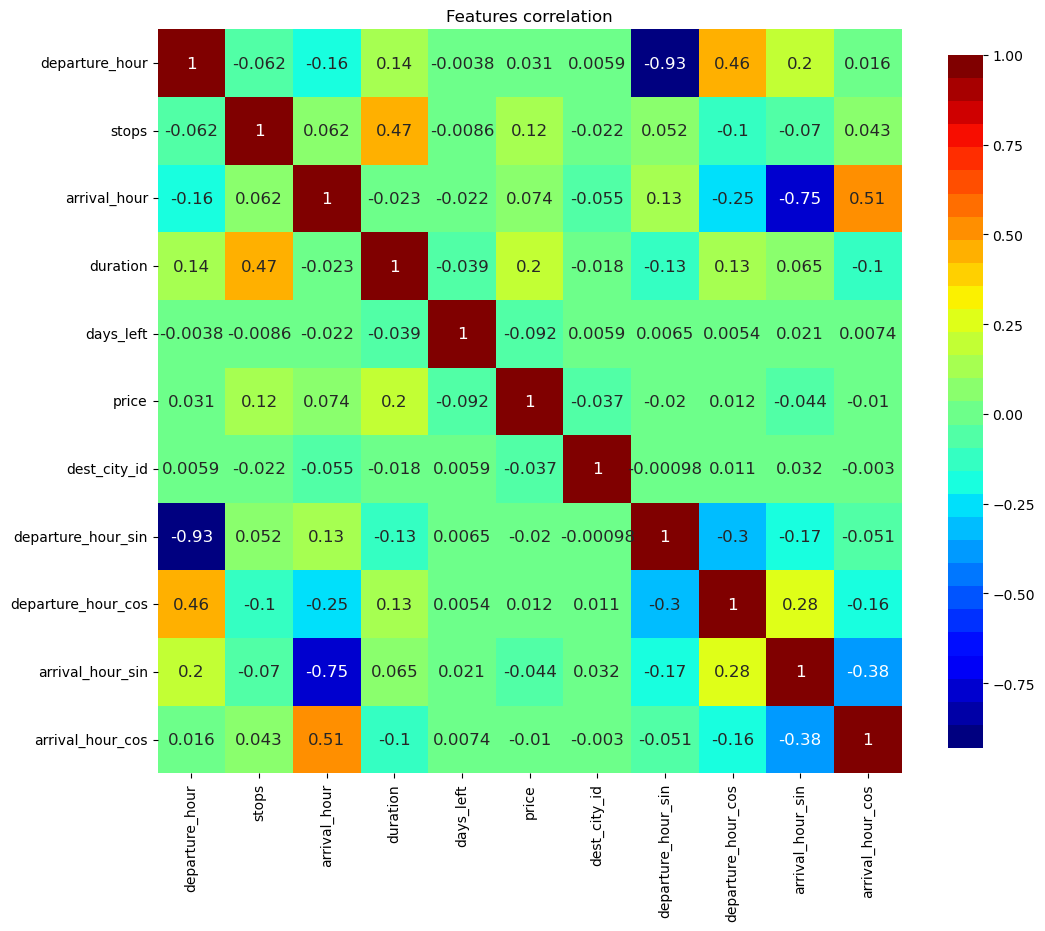

In [88]:
df = data.select_dtypes(include=['number'])
corr = df.corr(method='pearson')
cmap = cm.get_cmap('jet', 30)
_, ax = plt.subplots( figsize = ( 12 , 10 ) )
sns.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax,
annot = True, annot_kws = { 'fontsize' : 12 }, xticklabels=corr.columns,
yticklabels=corr.columns)
plt.title("Features correlation")

In [89]:
data.describe()

,departure_hour,stops,arrival_hour,duration,days_left,price,dest_city_id,departure_hour_sin,departure_hour_cos,arrival_hour_sin,arrival_hour_cos
count,300261.000000,300261.000000,300261.000000,300261.000000,300261.000000,300261.000000,300261.000000,3.002610e+05,300261.000000,300261.000000,3.002610e+05
mean,12.983531,0.924213,15.238935,733.065446,26.004473,20883.717666,2.420517,-2.834753e-02,-0.251852,-0.275453,-5.126126e-03
std,5.363186,0.398188,6.050231,431.576194,13.560985,22695.911266,1.783369,7.882863e-01,0.560691,0.669819,6.895250e-01
min,0.000000,0.000000,0.000000,50.000000,1.000000,1105.000000,0.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000e+00
25%,8.000000,1.000000,10.000000,405.000000,15.000000,4783.000000,1.000000,-8.660254e-01,-0.707107,-0.866025,-7.071068e-01
50%,12.000000,1.000000,17.000000,675.000000,26.000000,7425.000000,2.000000,1.224647e-16,-0.258819,-0.500000,-1.836970e-16
75%,18.000000,1.000000,20.000000,970.000000,38.000000,42521.000000,4.000000,8.660254e-01,0.258819,0.258819,7.071068e-01
max,23.000000,2.000000,23.000000,2990.000000,49.000000,123071.000000,5.000000,1.000000e+00,1.000000,1.000000,1.000000e+00


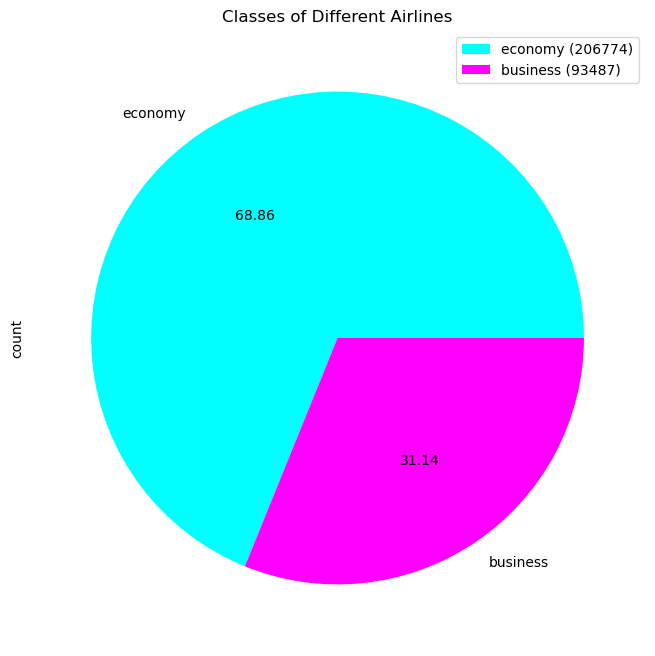

In [90]:
class_counts = data['class'].value_counts()

# Plotting
plt.figure(figsize=(10, 8))
pie = data['class'].value_counts().plot(kind='pie', autopct='%.2f', cmap='cool')
plt.title('Classes of Different Airlines')

# Get legend labels with counts
legend_labels = [f"{label} ({count})" for label, count in zip(class_counts.index, class_counts)]

plt.legend(legend_labels)
plt.show()

In [91]:
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [92]:
print(data['airline'].unique())

['SpiceJet' 'AirAsia' 'Vistara' 'GO FIRST' 'Indigo' 'Air India' 'Trujet'
 'StarAir']


In [93]:
airline_counts = data['airline'].value_counts()

print(airline_counts)

airline
Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: count, dtype: int64


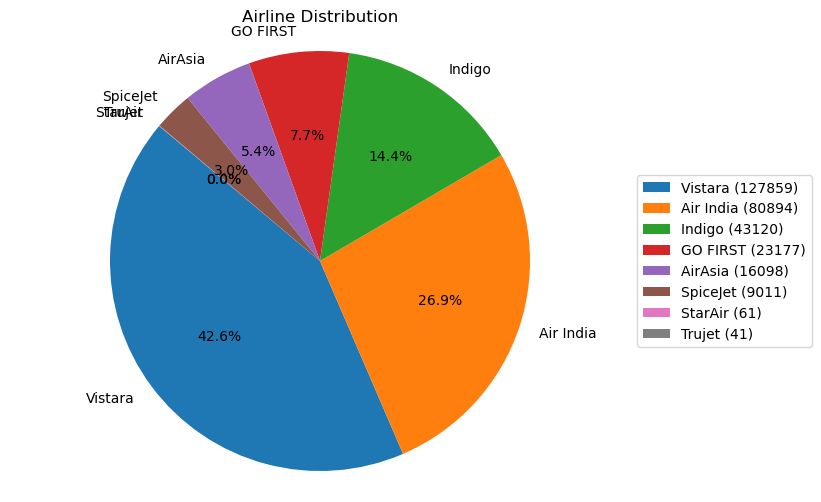

In [94]:
airline_counts = data['airline'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(airline_counts, labels=airline_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Airline Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add legend with counts
legend_labels = [f"{label} ({count})" for label, count in zip(airline_counts.index, airline_counts)]
plt.legend(legend_labels, loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

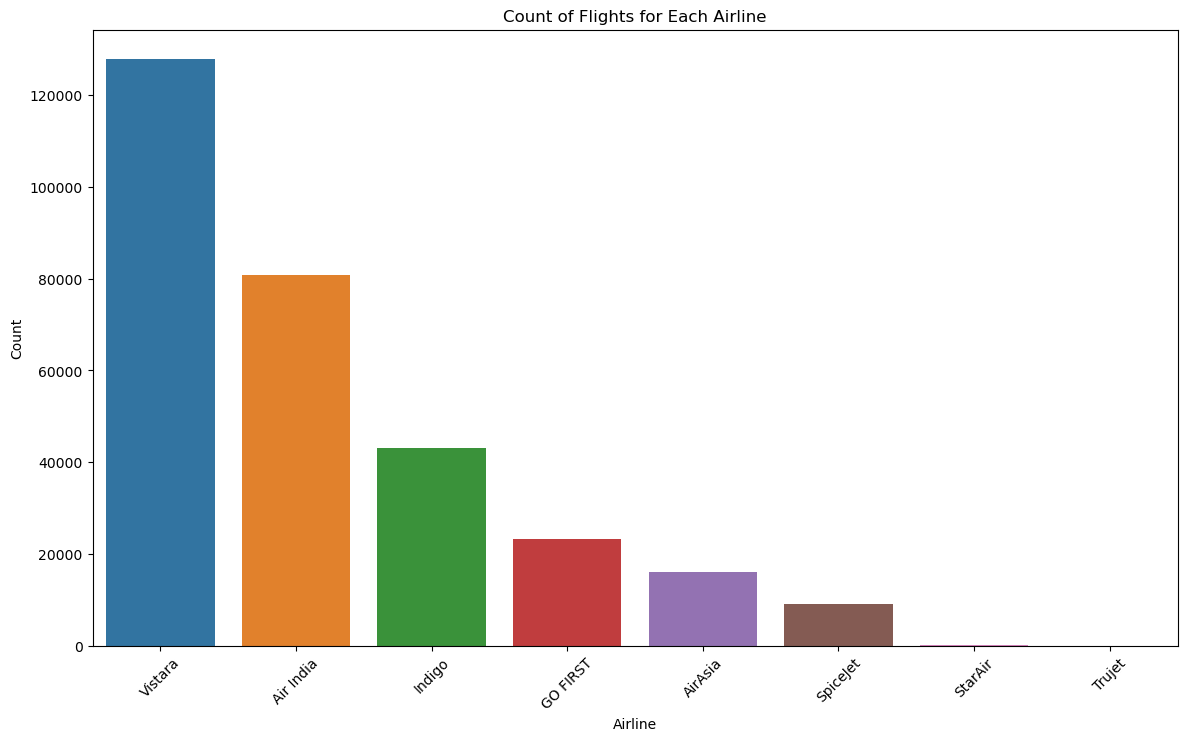

In [95]:
airline_counts = data['airline'].value_counts()

# Creating a bar chart for counts
plt.figure(figsize=(14, 8))
sns.barplot(x=airline_counts.index, y=airline_counts.values)
plt.title('Count of Flights for Each Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

In [96]:
data

,day_of_week,airline,source_city,departure_hour,departure_category,stops,arrival_hour,arrival_category,destination_city,class,duration,days_left,price,dest_city_id,departure_hour_sin,departure_hour_cos,arrival_hour_sin,arrival_hour_cos
0,Friday,SpiceJet,Delhi,18,Evening,0,21,Night,Mumbai,economy,130,1,5953,0,-1.000000e+00,-1.836970e-16,-7.071068e-01,7.071068e-01
1,Friday,SpiceJet,Delhi,6,Early Morning,0,8,Morning,Mumbai,economy,140,1,5953,0,1.000000e+00,6.123234e-17,8.660254e-01,-5.000000e-01
2,Friday,AirAsia,Delhi,4,Early Morning,0,6,Early Morning,Mumbai,economy,130,1,5956,0,8.660254e-01,5.000000e-01,1.000000e+00,6.123234e-17
3,Friday,Vistara,Delhi,10,Morning,0,12,Afternoon,Mumbai,economy,135,1,5955,0,5.000000e-01,-8.660254e-01,1.224647e-16,-1.000000e+00
4,Friday,Vistara,Delhi,8,Morning,0,11,Morning,Mumbai,economy,140,1,5955,0,8.660254e-01,-5.000000e-01,2.588190e-01,-9.659258e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,Thursday,Vistara,Chennai,9,Morning,1,19,Evening,Hyderabad,business,605,49,69265,3,7.071068e-01,-7.071068e-01,-9.659258e-01,2.588190e-01
300257,Thursday,Vistara,Chennai,12,Afternoon,1,22,Night,Hyderabad,business,625,49,77105,3,1.224647e-16,-1.000000e+00,-5.000000e-01,8.660254e-01
300258,Thursday,Vistara,Chennai,7,Early Morning,1,20,Night,Hyderabad,business,830,49,79099,3,9.659258e-01,-2.588190e-01,-8.660254e-01,5.000000e-01
300259,Thursday,Vistara,Chennai,7,Early Morning,1,17,Evening,Hyderabad,business,600,49,81585,3,9.659258e-01,-2.588190e-01,-9.659258e-01,-2.588190e-01


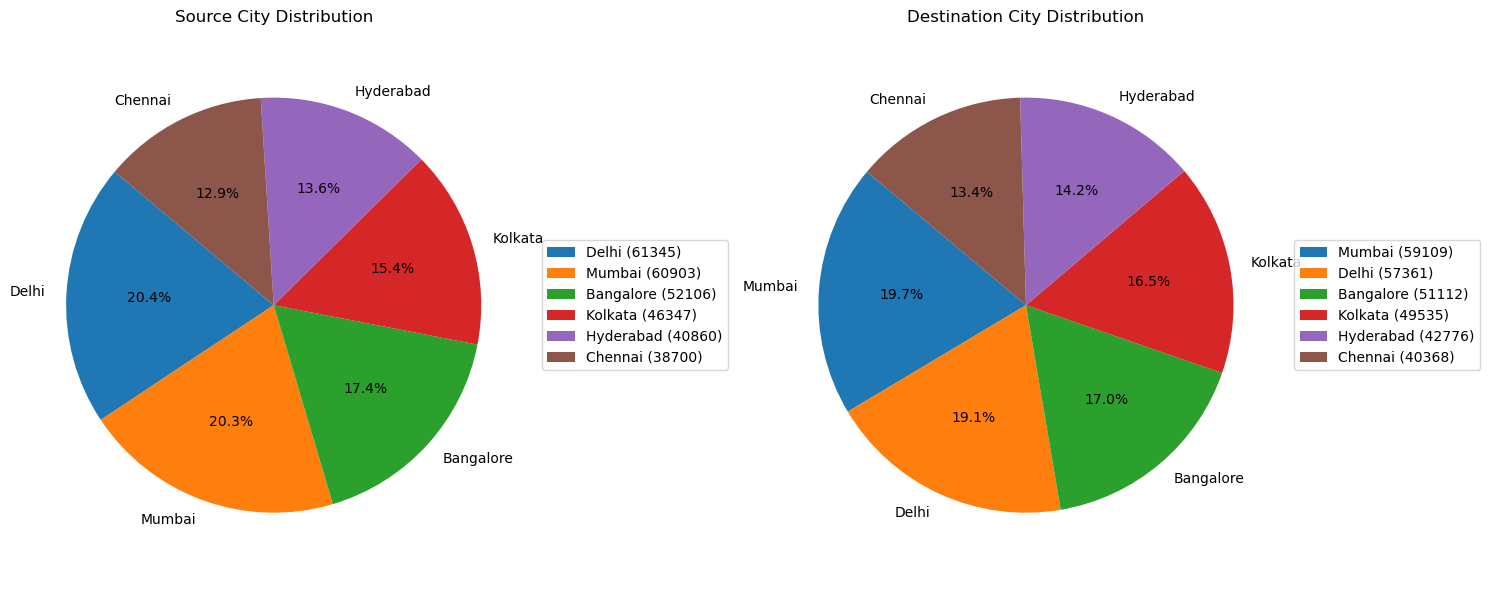

In [97]:
# Count occurrences of source cities
source_city_counts = data['source_city'].value_counts()

# Count occurrences of destination cities
destination_city_counts = data['destination_city'].value_counts()

# Plotting source city distribution
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.pie(source_city_counts, labels=source_city_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Source City Distribution')
plt.axis('equal')

# Add legend for source cities with counts
legend_labels_source = [f"{label} ({count})" for label, count in zip(source_city_counts.index, source_city_counts)]
plt.legend(legend_labels_source, loc="center left", bbox_to_anchor=(1, 0.5))

# Plotting destination city distribution
plt.subplot(1, 2, 2)
plt.pie(destination_city_counts, labels=destination_city_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Destination City Distribution')
plt.axis('equal')

# Add legend for destination cities with counts
legend_labels_destination = [f"{label} ({count})" for label, count in zip(destination_city_counts.index, destination_city_counts)]
plt.legend(legend_labels_destination, loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

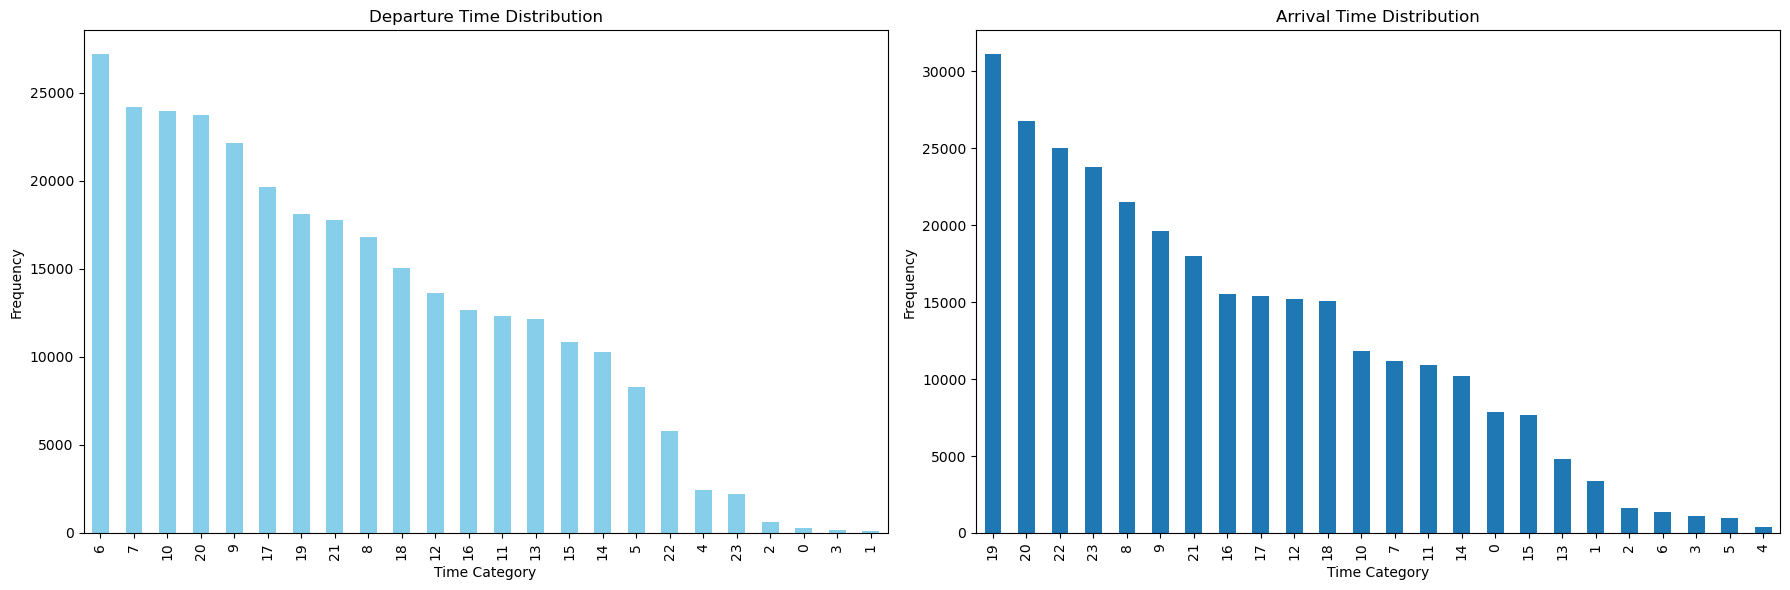

In [98]:
departure_time_counts = data['departure_hour'].value_counts()

# Count occurrences of each arrival time category
arrival_time_counts = data['arrival_hour'].value_counts()

# Plotting
plt.figure(figsize=(18, 6))

# Bar chart for departure time categories
plt.subplot(1, 2, 1)
departure_time_counts.plot(kind='bar', color='skyblue')
plt.title('Departure Time Distribution')
plt.xlabel('Time Category')
plt.ylabel('Frequency')

# Bar chart for arrival time categories
plt.subplot(1, 2, 2)
arrival_time_counts.plot(kind='bar' )
plt.title('Arrival Time Distribution')
plt.xlabel('Time Category')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

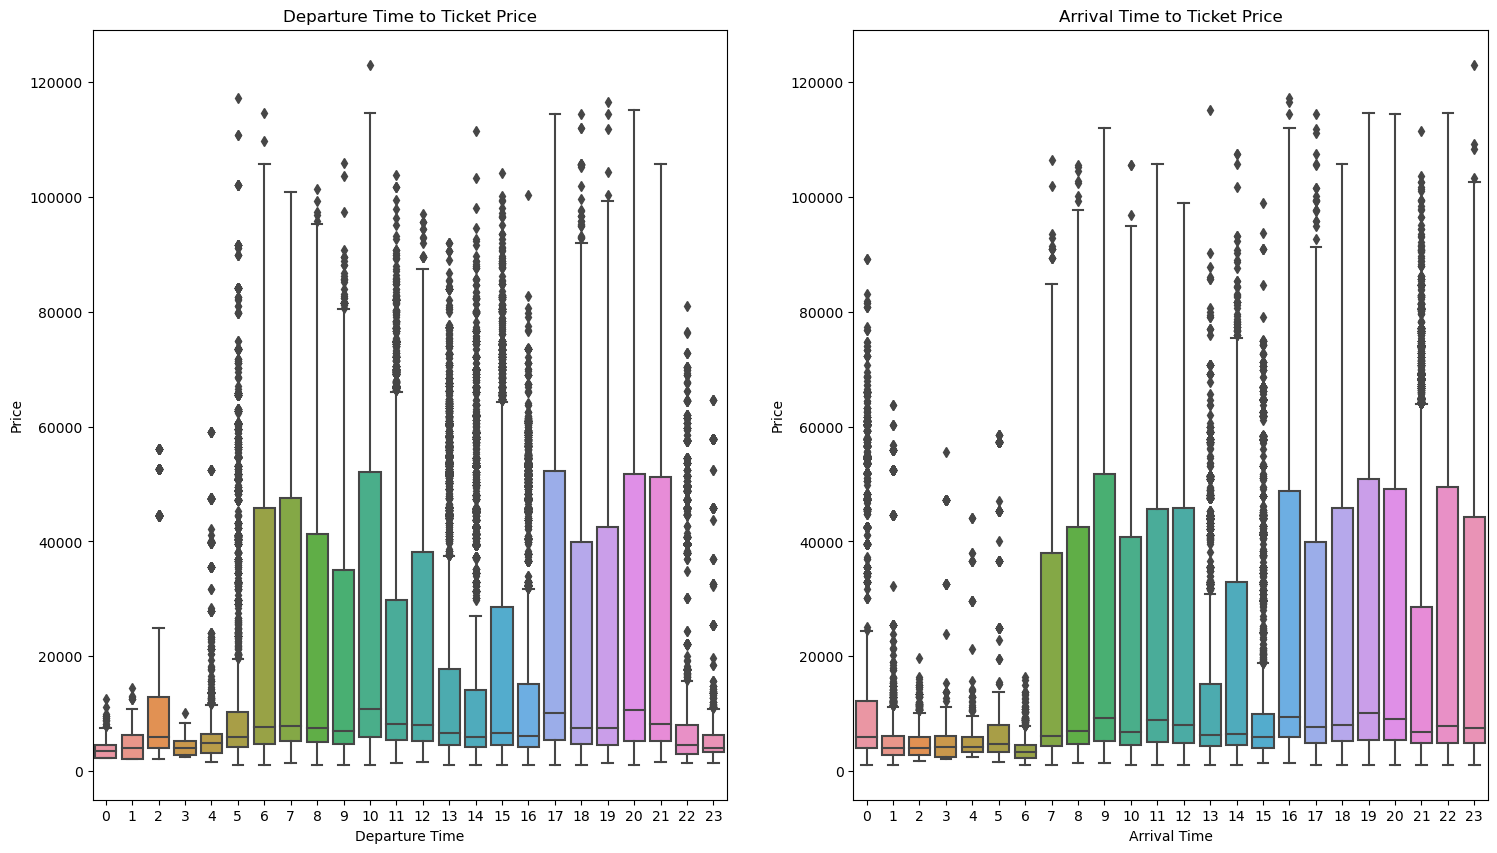

In [99]:
plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_hour',y='price',data=data)
plt.title('Departure Time to Ticket Price')
plt.xlabel('Departure Time')
plt.ylabel('Price')
plt.subplot(1,2,2)
sns.boxplot(x='arrival_hour',y='price',data=data)
plt.title('Arrival Time to Ticket Price')
plt.xlabel('Arrival Time')
plt.ylabel('Price')
plt.show()

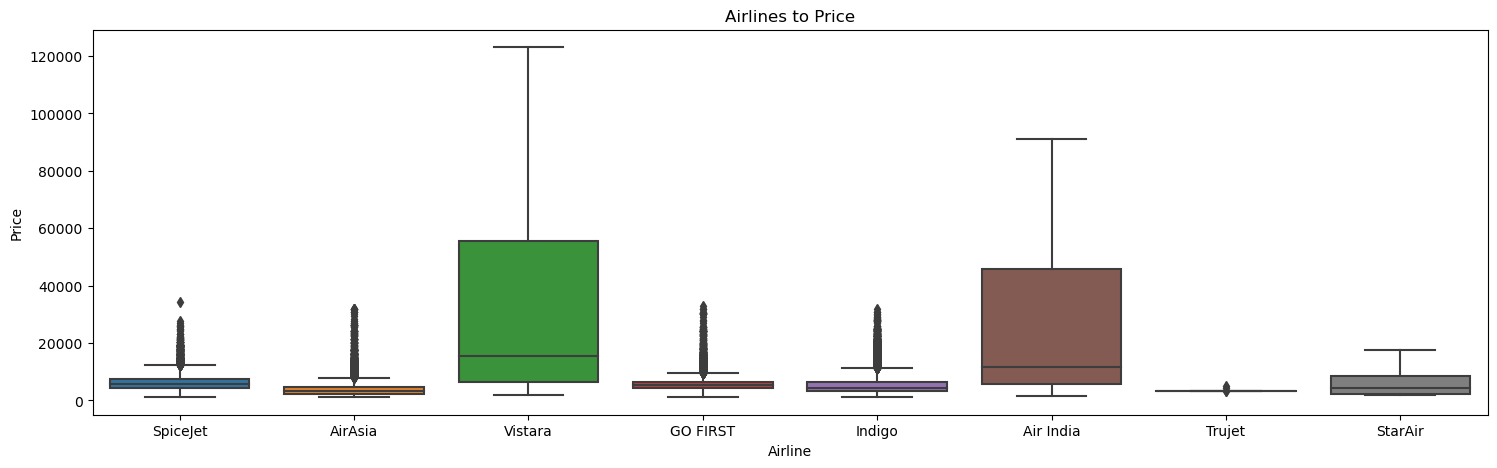

In [100]:
plt.figure(figsize=(18,5))
sns.boxplot(x=data['airline'],y=data['price'])
plt.title('Airlines to Price')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

airline
Air India    23506.647217
AirAsia       4091.072742
GO FIRST      5651.930578
Indigo        5324.216303
SpiceJet      6179.278881
StarAir       4932.655738
Trujet        3244.634146
Vistara      30396.536302
Name: price, dtype: float64


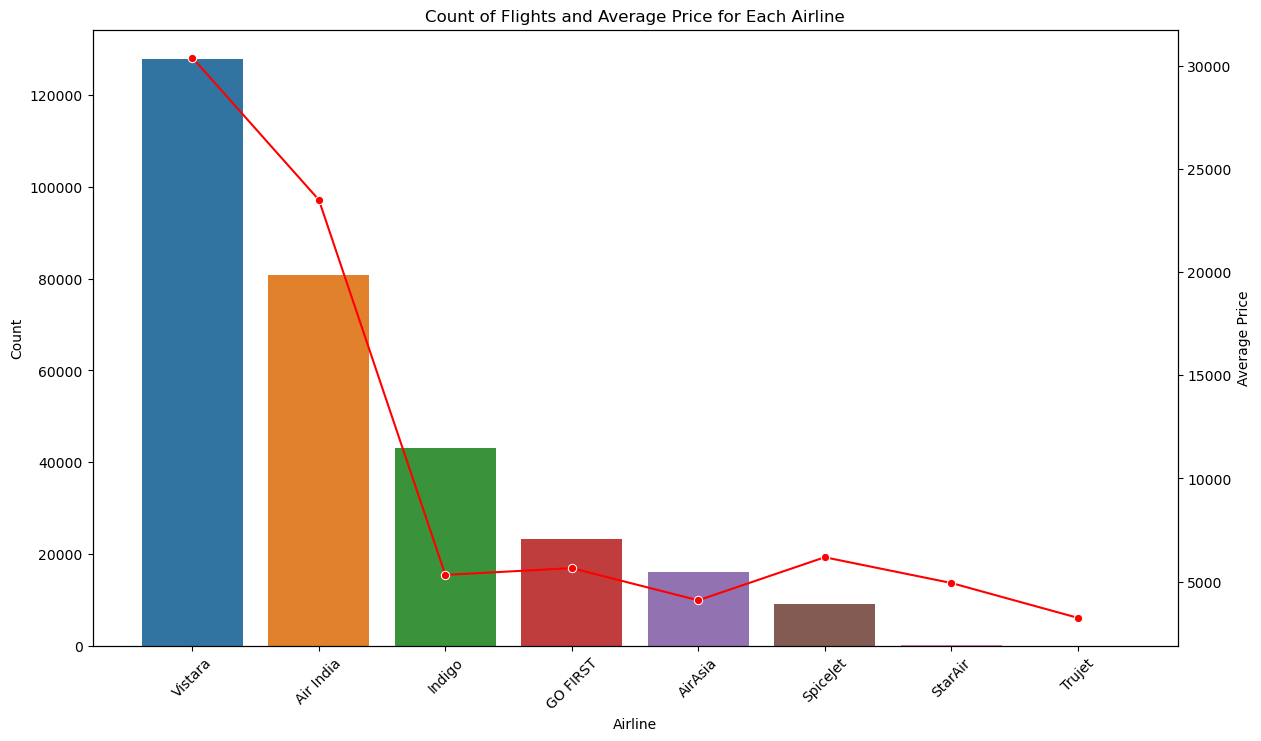

In [101]:
# Calculate the average price for each airline
average_prices = data.groupby('airline')['price'].mean()
print(average_prices)

# Ensure the order of average_prices matches the order of airline_counts
average_prices = average_prices.reindex(airline_counts.index)

# Create the count plot
fig, ax1 = plt.subplots(figsize=(14, 8))
sns.barplot(x=airline_counts.index, y=airline_counts.values, ax=ax1)
ax1.set_title('Count of Flights and Average Price for Each Airline')
ax1.set_xlabel('Airline')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

# Create the average price line plot on a secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(x=airline_counts.index, y=average_prices.values, ax=ax2, color='r', marker="o")
ax2.set_ylabel('Average Price')
ax2.grid(False)  # Hide the secondary grid

plt.show()



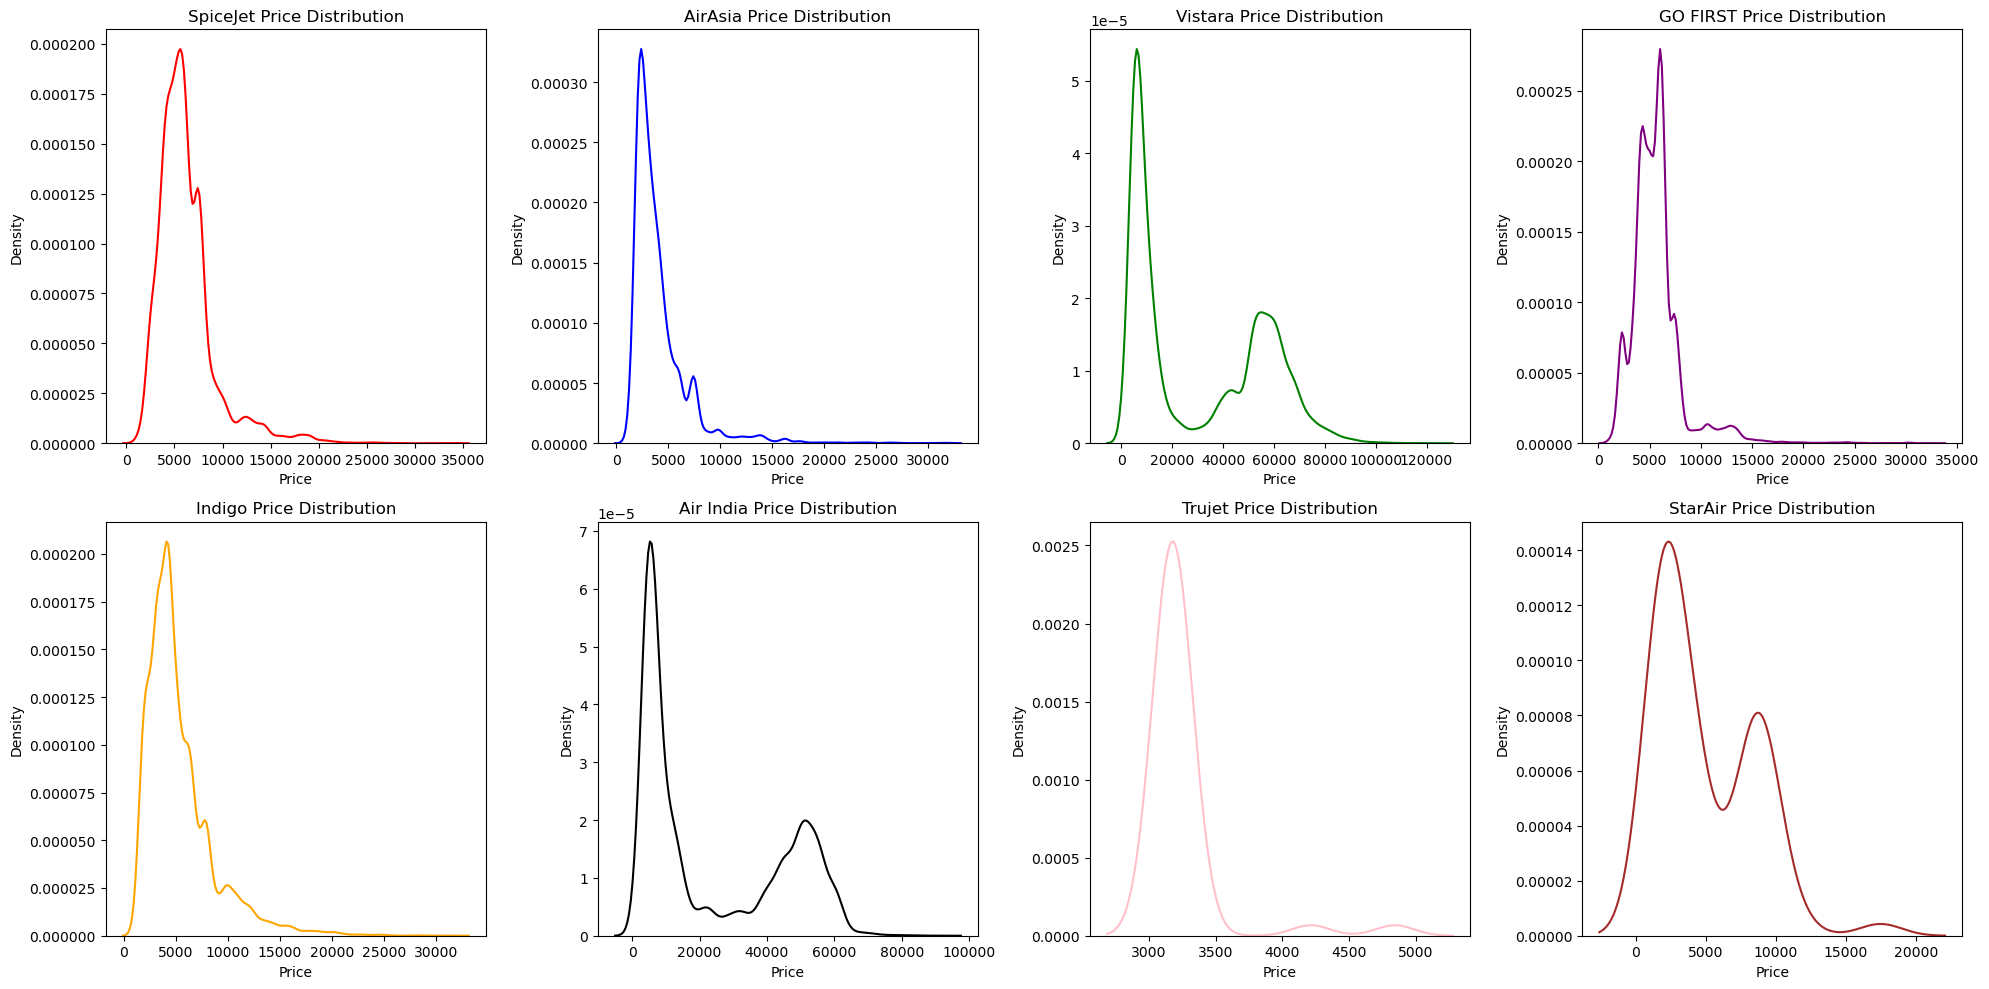

In [102]:
# Assuming 'airline' is the column with airline names
colors = ['red', 'blue', 'green', 'purple', 'orange', 'black', 'pink', 'brown']
unique_airlines = data['airline'].unique()

# Setup for a 2x4 grid, adjust if you have more or fewer than 8 airlines
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, airline in enumerate(unique_airlines):
    # Filter data for the current airline
    airline_data = data[data['airline'] == airline]
    
    # Plot KDE on the corresponding subplot
    sns.kdeplot(data=airline_data, x='price', ax=axes[i], color=colors[i % len(colors)])
    axes[i].set_title(f'{airline} Price Distribution')
    axes[i].set_xlabel('Price')
    axes[i].set_ylabel('Density')

# If there are any remaining subplots, turn them off
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

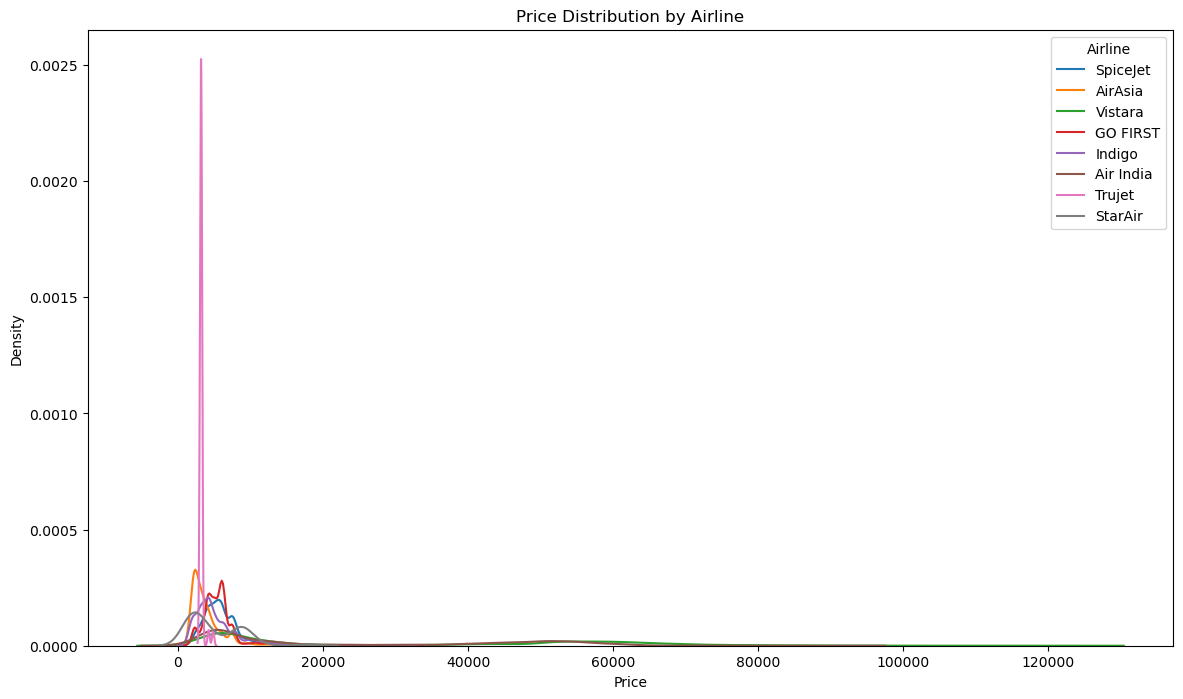

In [103]:
plt.figure(figsize=(14, 8))

# Loop through each unique airline and plot its price distribution on the same graph
for airline in unique_airlines:
    sns.kdeplot(data=data[data['airline'] == airline], x='price', label=airline)

plt.title('Price Distribution by Airline')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend(title='Airline')
plt.show()

In [104]:
vistara_high_price_count = data[(data['airline'] == 'Vistara') & (data['price'] > 123070)].shape[0]
print(vistara_high_price_count)


1


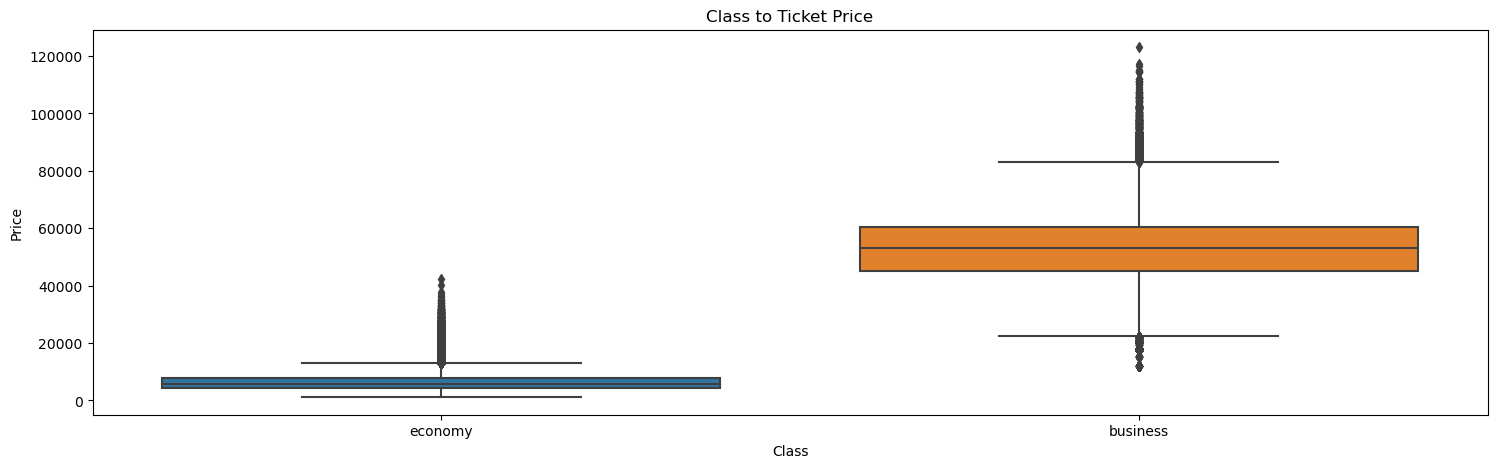

In [105]:
plt.figure(figsize=(18,5))
sns.boxplot(x='class',y='price',data=data)
plt.title('Class to Ticket Price')
plt.xlabel('Class')
plt.ylabel('Price')
plt.show()

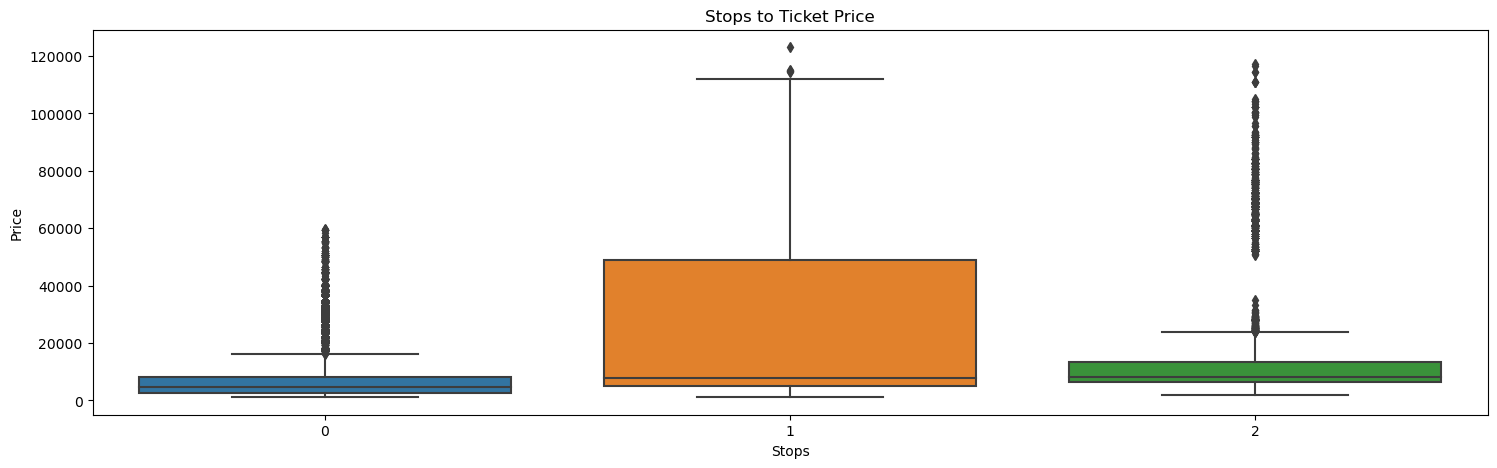

In [106]:
plt.figure(figsize=(18,5))
sns.boxplot(x='stops',y='price',data=data)
plt.title('Stops to Ticket Price')
plt.xlabel('Stops')
plt.ylabel('Price')
plt.show()

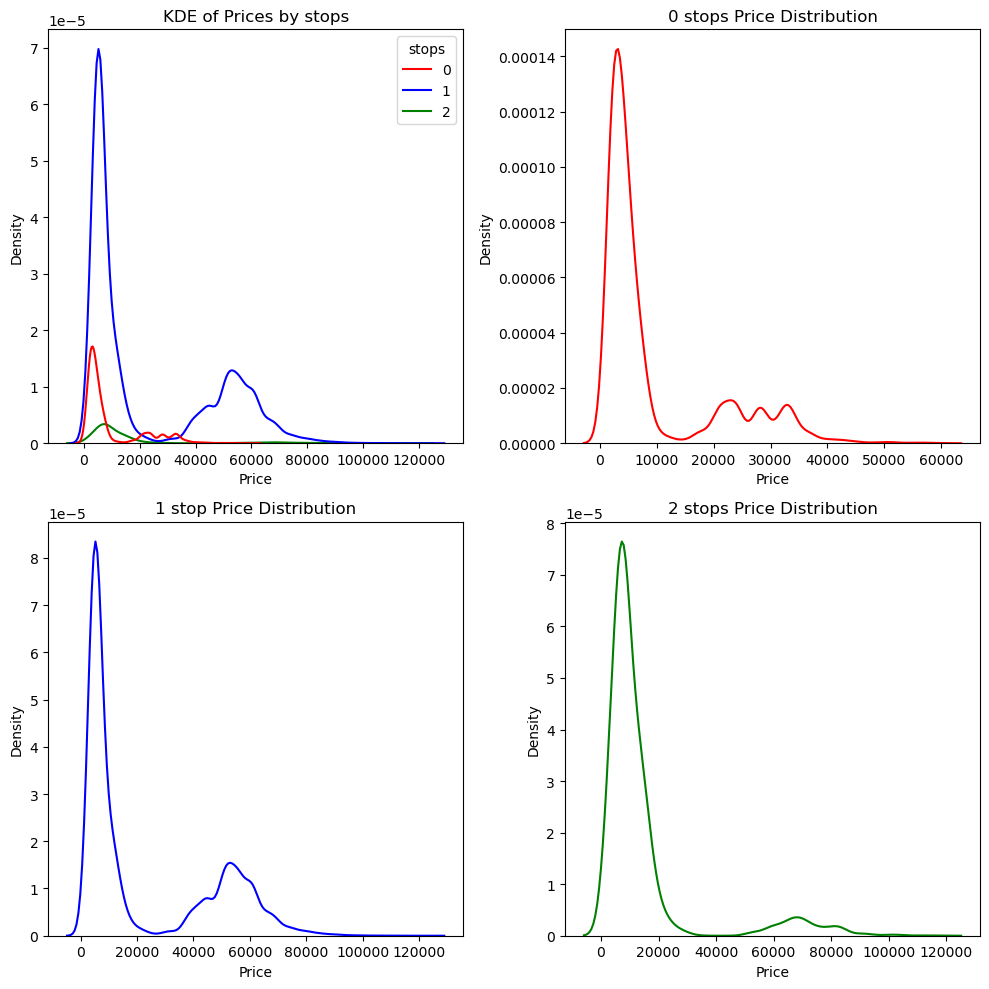

In [107]:
colors = ['red', 'blue', 'green']

# Creating subplots for Economy and Business classes separately
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.kdeplot(data=data, x='price', hue='stops', palette=colors, ax=axes[0][0])
axes[0][0].set_title('KDE of Prices by stops')
axes[0][0].set_xlabel('Price')
axes[0][0].set_ylabel('Density')

# Economy Class Price Distribution
sns.kdeplot(data=data[data['stops'] == 0], x='price', ax=axes[0][1], color='red')
axes[0][1].set_title('0 stops Price Distribution')
axes[0][1].set_xlabel('Price')
axes[0][1].set_ylabel('Density')

# Business Class Price Distribution
sns.kdeplot(data=data[data['stops'] == 1], x='price', ax=axes[1][0], color='blue')
axes[1][0].set_title('1 stop Price Distribution')
axes[1][0].set_xlabel('Price')
axes[1][0].set_ylabel('Density')
sns.kdeplot(data=data[data['stops'] == 2], x='price', ax=axes[1][1], color='green')
axes[1][1].set_title('2 stops Price Distribution')
axes[1][1].set_xlabel('Price')
axes[1][1].set_ylabel('Density')

plt.tight_layout()
plt.show()

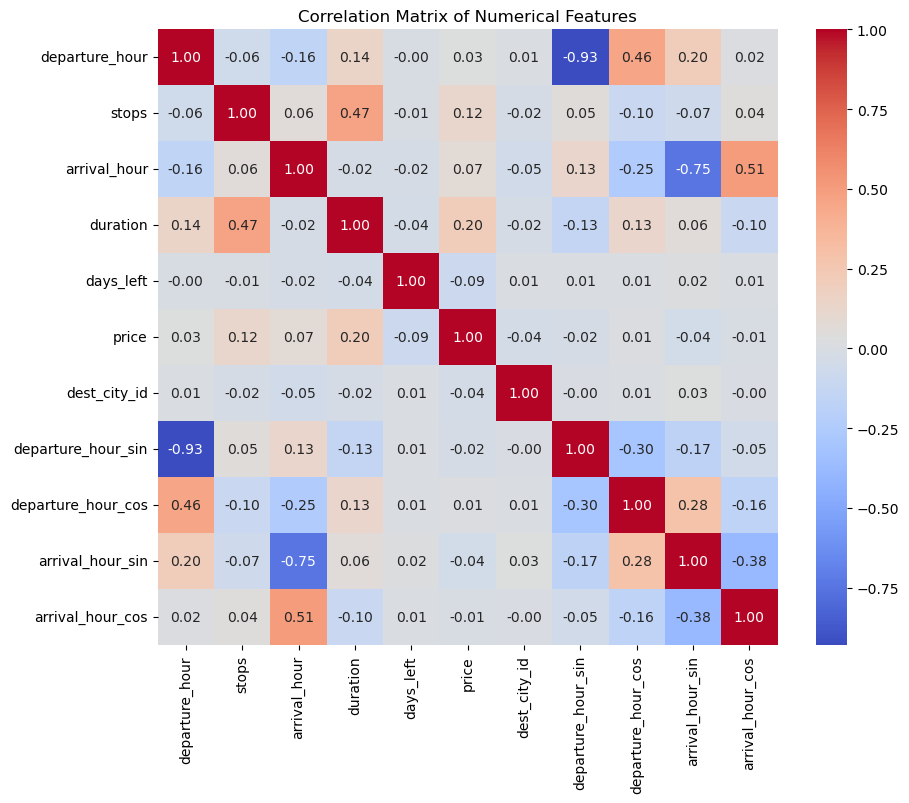

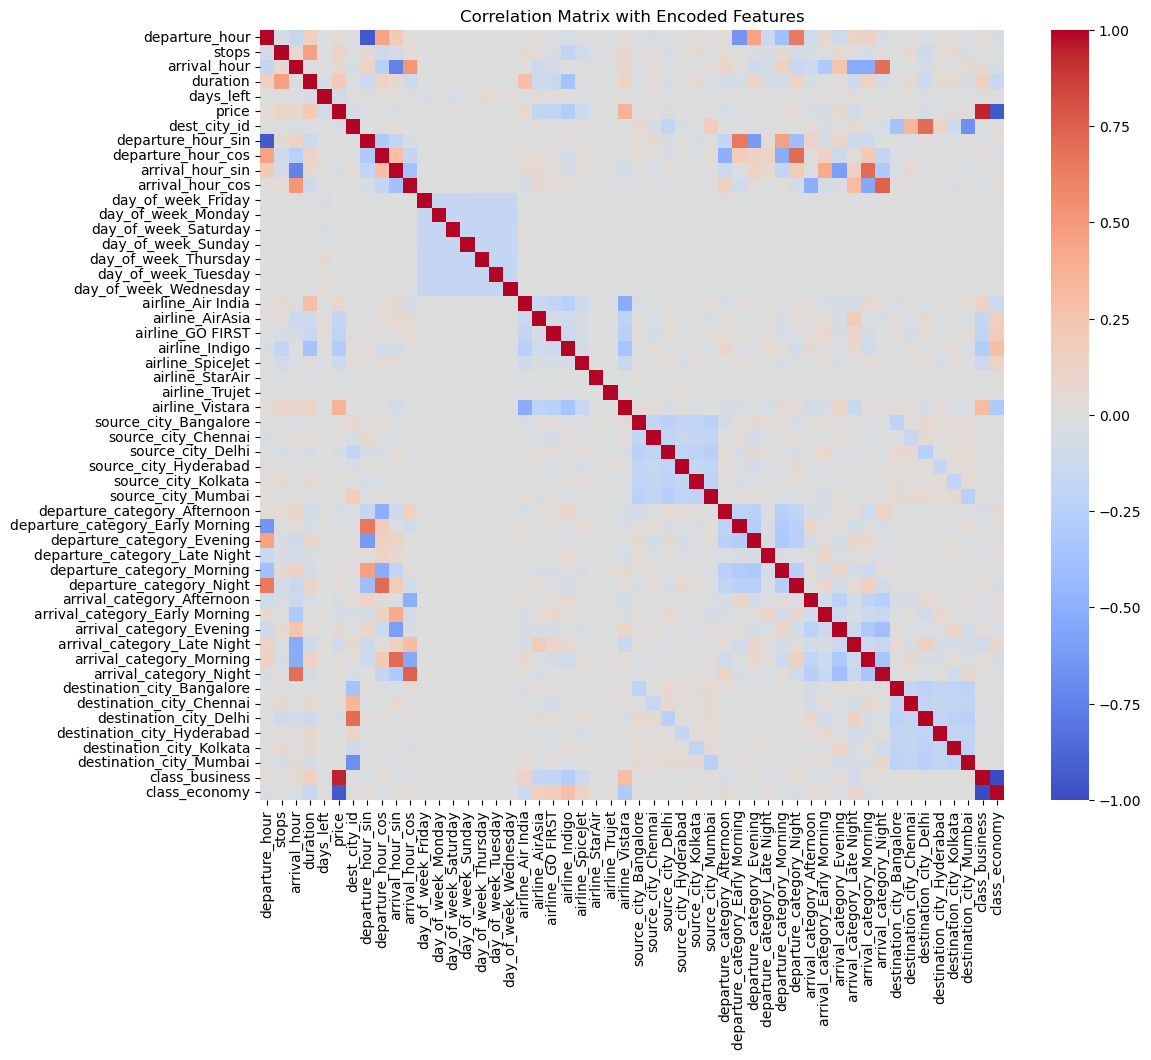

In [108]:
# Correlation matrix
# Filtering out non-numerical columns for the correlation matrix
numerical_data = data.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Make a copy of the original dataframe to keep it unchanged
encoded_data = data.copy()

# Select only the object columns (assuming these are the categorical variables)
categorical_columns = encoded_data.select_dtypes(include=['object']).columns

# Apply one-hot encoding to these columns
encoded_data = pd.get_dummies(encoded_data, columns=categorical_columns, drop_first=False)

# Now you can compute the correlation matrix for the whole dataset
correlation_matrix = encoded_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix with Encoded Features')
plt.show()

# Observations:
# We can see from the matrix with enccoded features a strong negative correlation between price and class_economy.
# and a strong positive correlation between price and class_business.



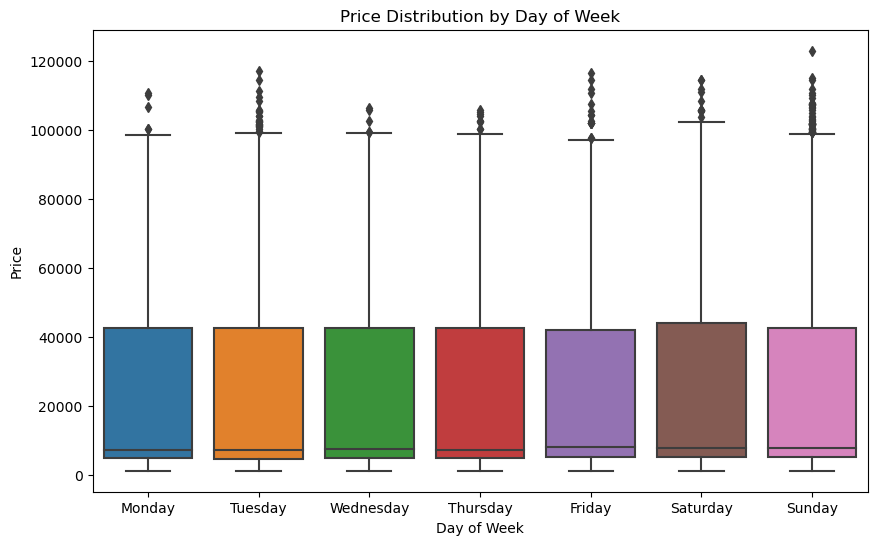

In [109]:
# Price by Day of Week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='price', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Price Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Price')
plt.show()

In [110]:
print(np.std(numerical_data))

departure_hour            5.363177
stops                     0.398188
arrival_hour              6.050221
duration                431.575476
days_left                13.560962
price                 22695.873472
dest_city_id              1.783366
departure_hour_sin        0.788285
departure_hour_cos        0.560690
arrival_hour_sin          0.669818
arrival_hour_cos          0.689524
dtype: float64


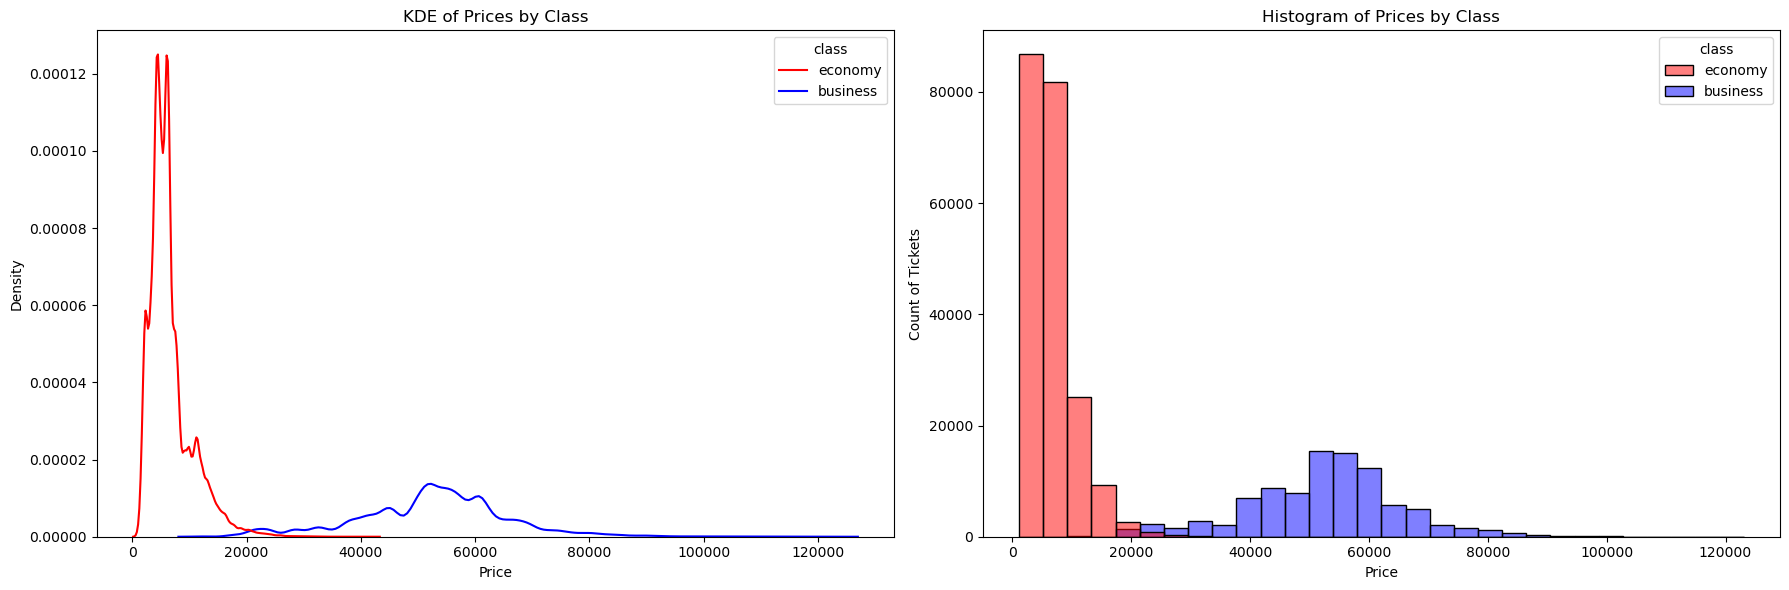

In [111]:
# Creating a figure with two subplots side by side for the KDE and histogram plots
colors=['red', 'blue']
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plotting the KDE on the first subplot
sns.kdeplot(data=data, x='price', hue='class', palette=colors, ax=axes[0])
axes[0].set_title('KDE of Prices by Class')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Density')

# Plotting the histogram on the second subplot
sns.histplot(data=data, x='price', hue='class', palette=colors, bins=30, kde=False, ax=axes[1])
axes[1].set_title('Histogram of Prices by Class')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Count of Tickets')

plt.tight_layout()
plt.show()


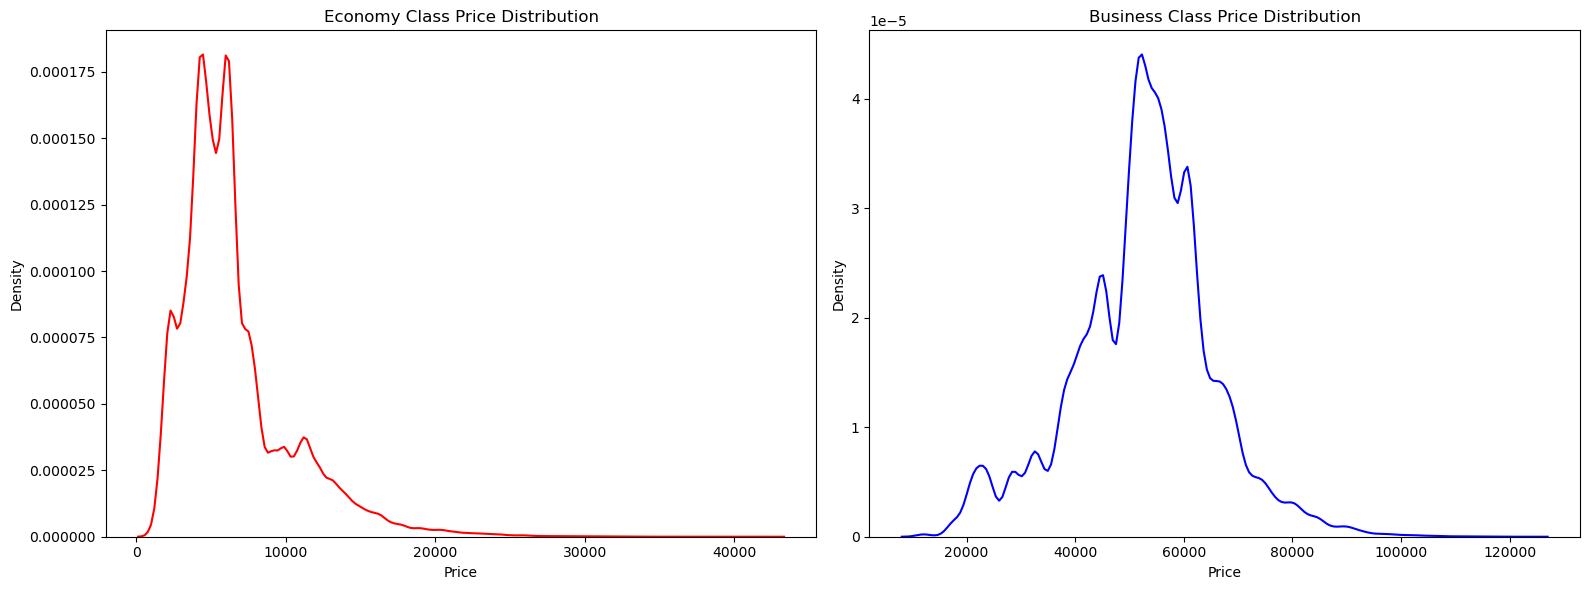

In [112]:
# Setting up the colors for each class
colors = ['red', 'blue']

# Creating subplots for Economy and Business classes separately
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Economy Class Price Distribution
sns.kdeplot(data=data[data['class'] == 'economy'], x='price', ax=axes[0], color='red')
axes[0].set_title('Economy Class Price Distribution')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Density')

# Business Class Price Distribution
sns.kdeplot(data=data[data['class'] == 'business'], x='price', ax=axes[1], color='blue')
axes[1].set_title('Business Class Price Distribution')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()


In [113]:
from scipy.stats import normaltest
# p-value of 0.05 or greater means that the distribution
# is a normal distribution
economy_prices = data[data['class'] == 'economy']['price']
business_prices = data[data['class'] == 'business']['price']

# Perform the normality test
economy_normaltest_result = normaltest(economy_prices.dropna())  # Using dropna() to ensure no NaN values interfere
business_normaltest_result = normaltest(business_prices.dropna())

print("Economy Class Prices Normality Test:")
print(f"Statistic: {economy_normaltest_result.statistic}, P-value: {economy_normaltest_result.pvalue}")

print("\nBusiness Class Prices Normality Test:")
print(f"Statistic: {business_normaltest_result.statistic}, P-value: {business_normaltest_result.pvalue}")

Economy Class Prices Normality Test:
Statistic: 69995.65229354819, P-value: 0.0

Business Class Prices Normality Test:
Statistic: 1477.4614209842694, P-value: 0.0


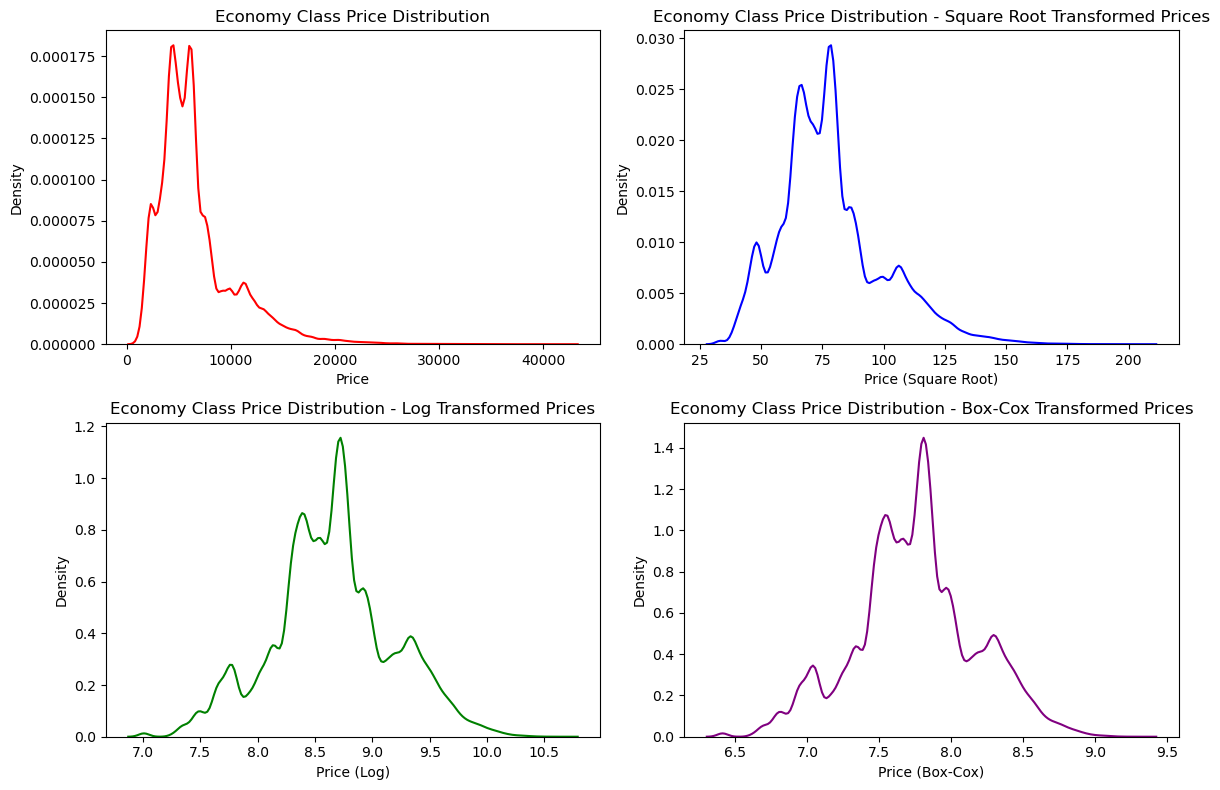

In [114]:
# Filter the dataset for 'Economy' class and remove any rows with price <= 0 to avoid issues with transformations
economy_data = data[data['class'] == 'economy']
economy_data = economy_data[economy_data['price'] > 0]

# Applying transformations
economy_data['price_sqrt'] = np.sqrt(economy_data['price'])
economy_data['price_log'] = np.log(economy_data['price'])
economy_data['price_boxcox'], _ = boxcox(economy_data['price'])

# Creating a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Original Price Distribution
sns.kdeplot(data=economy_data, x='price', ax=axes[0][0], color='red')
axes[0][0].set_title('Economy Class Price Distribution')
axes[0][0].set_xlabel('Price')
axes[0][0].set_ylabel('Density')

# Square Root Transformation
sns.kdeplot(data=economy_data, x='price_sqrt', ax=axes[0][1], color='blue')
axes[0][1].set_title('Economy Class Price Distribution - Square Root Transformed Prices')
axes[0][1].set_xlabel('Price (Square Root)')
axes[0][1].set_ylabel('Density')

# Log Transformation
sns.kdeplot(data=economy_data, x='price_log', ax=axes[1][0], color='green')
axes[1][0].set_title('Economy Class Price Distribution - Log Transformed Prices')
axes[1][0].set_xlabel('Price (Log)')
axes[1][0].set_ylabel('Density')

# Box-Cox Transformation
sns.kdeplot(data=economy_data, x='price_boxcox', ax=axes[1][1], color='purple')
axes[1][1].set_title('Economy Class Price Distribution - Box-Cox Transformed Prices')
axes[1][1].set_xlabel('Price (Box-Cox)')
axes[1][1].set_ylabel('Density')

plt.tight_layout()
plt.show()

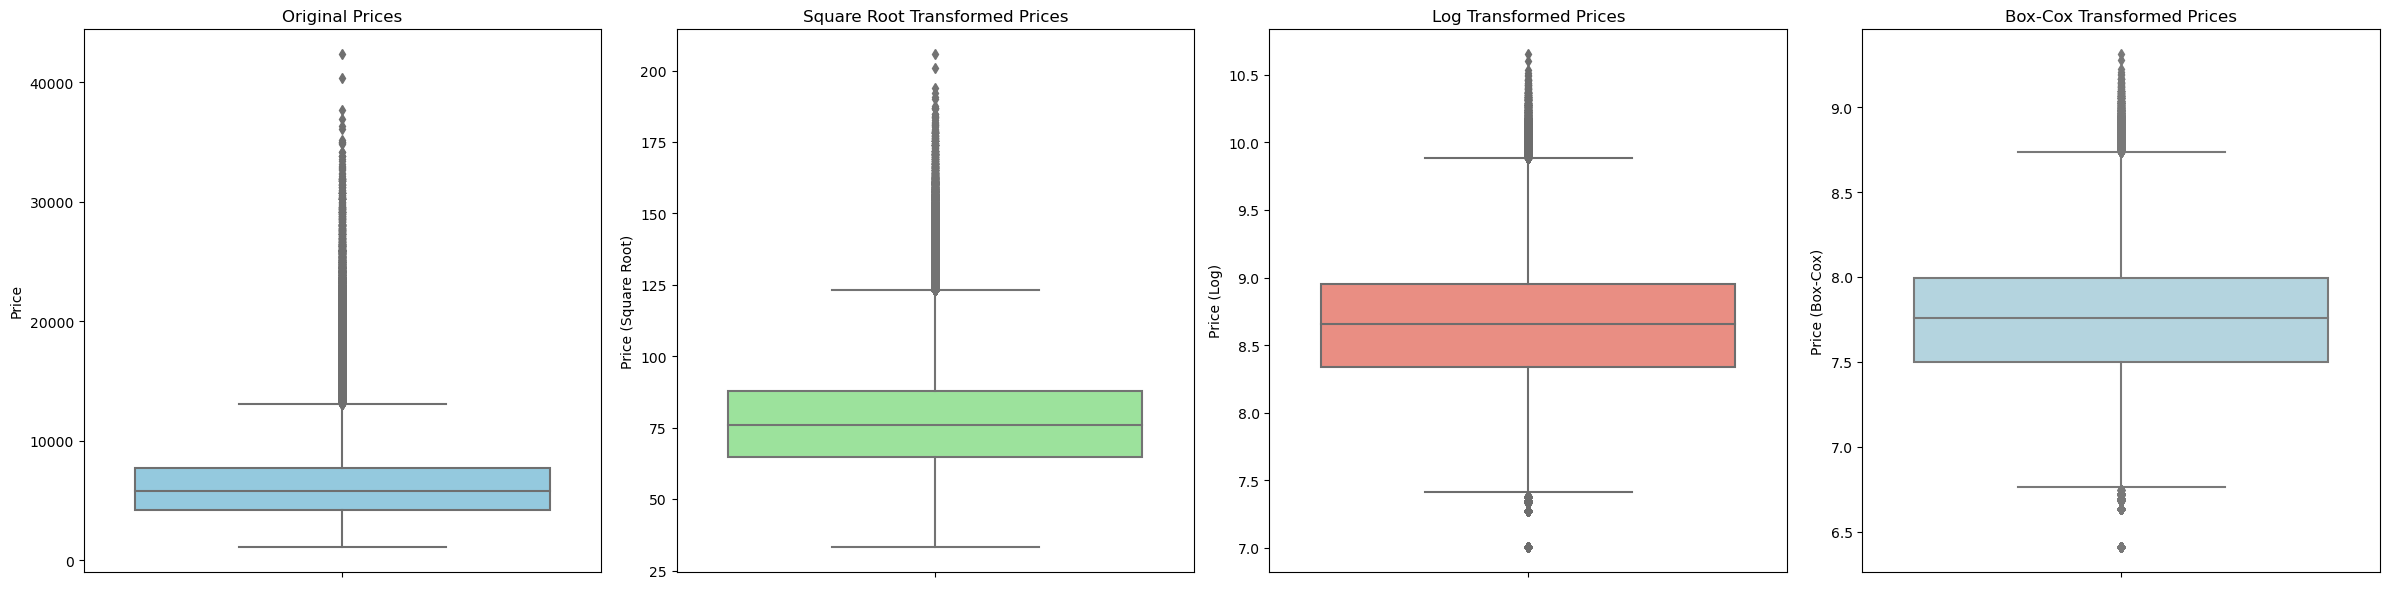

In [116]:
# Creating a figure with 4 subplots for boxplots of original and transformed prices
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# Original Price Boxplot
sns.boxplot(y=economy_data['price'], ax=axes[0], color='skyblue')
axes[0].set_title('Original Prices')
axes[0].set_ylabel('Price')

# Square Root Transformed Price Boxplot
sns.boxplot(y=economy_data['price_sqrt'], ax=axes[1], color='lightgreen')
axes[1].set_title('Square Root Transformed Prices')
axes[1].set_ylabel('Price (Square Root)')

# Log Transformed Price Boxplot
sns.boxplot(y=economy_data['price_log'], ax=axes[2], color='salmon')
axes[2].set_title('Log Transformed Prices')
axes[2].set_ylabel('Price (Log)')

# Box-Cox Transformed Price Boxplot
sns.boxplot(y=economy_data['price_boxcox'], ax=axes[3], color='lightblue')
axes[3].set_title('Box-Cox Transformed Prices')
axes[3].set_ylabel('Price (Box-Cox)')

plt.tight_layout()
plt.show()

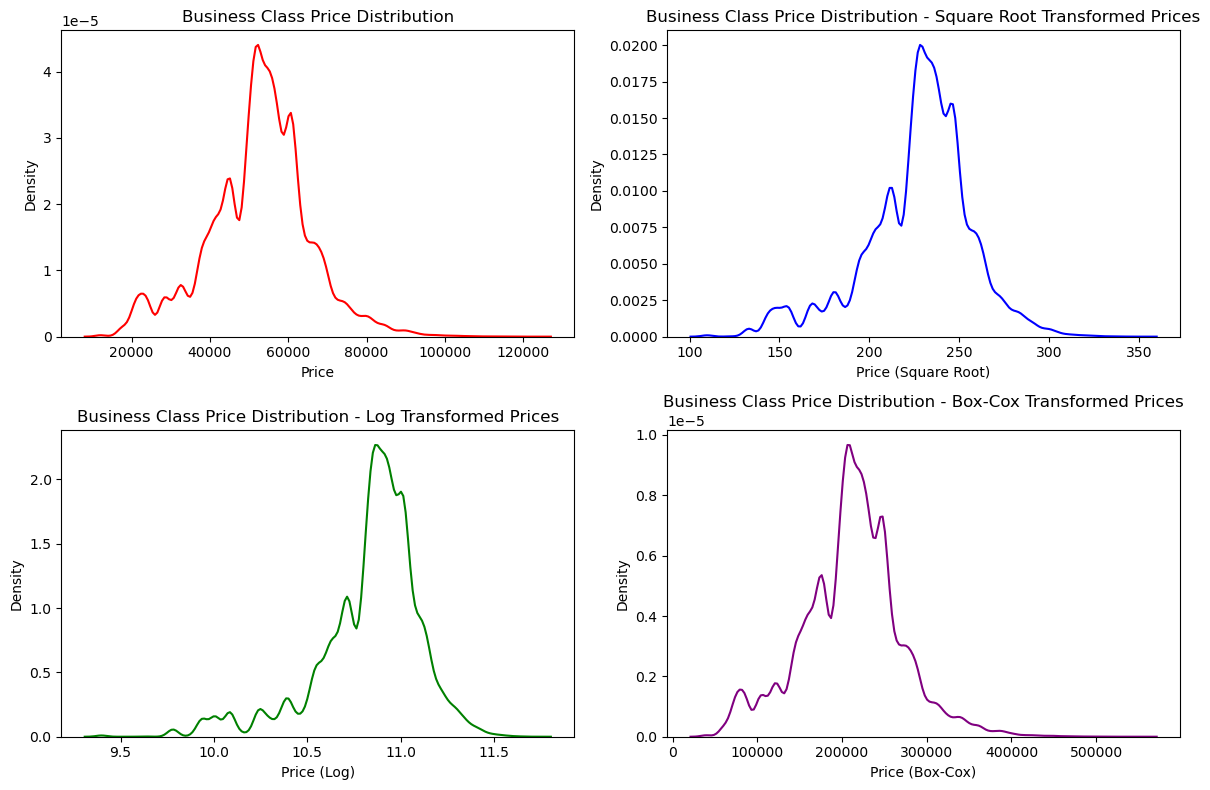

In [117]:
# Filter the dataset for 'business' class and remove any rows with price <= 0 to avoid issues with transformations
business_data = data[data['class'] == 'business']
business_data = business_data[business_data['price'] > 0]

# Applying transformations
business_data['price_sqrt'] = np.sqrt(business_data['price'])
business_data['price_log'] = np.log(business_data['price'])
business_data['price_boxcox'], _ = boxcox(business_data['price'])

# Creating a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Original Price Distribution
sns.kdeplot(data=business_data, x='price', ax=axes[0][0], color='red')
axes[0][0].set_title('Business Class Price Distribution')
axes[0][0].set_xlabel('Price')
axes[0][0].set_ylabel('Density')

# Square Root Transformation
sns.kdeplot(data=business_data, x='price_sqrt', ax=axes[0][1], color='blue')
axes[0][1].set_title('Business Class Price Distribution - Square Root Transformed Prices')
axes[0][1].set_xlabel('Price (Square Root)')
axes[0][1].set_ylabel('Density')

# Log Transformation
sns.kdeplot(data=business_data, x='price_log', ax=axes[1][0], color='green')
axes[1][0].set_title('Business Class Price Distribution - Log Transformed Prices')
axes[1][0].set_xlabel('Price (Log)')
axes[1][0].set_ylabel('Density')

# Box-Cox Transformation
sns.kdeplot(data=business_data, x='price_boxcox', ax=axes[1][1], color='purple')
axes[1][1].set_title('Business Class Price Distribution - Box-Cox Transformed Prices')
axes[1][1].set_xlabel('Price (Box-Cox)')
axes[1][1].set_ylabel('Density')

plt.tight_layout()
plt.show()

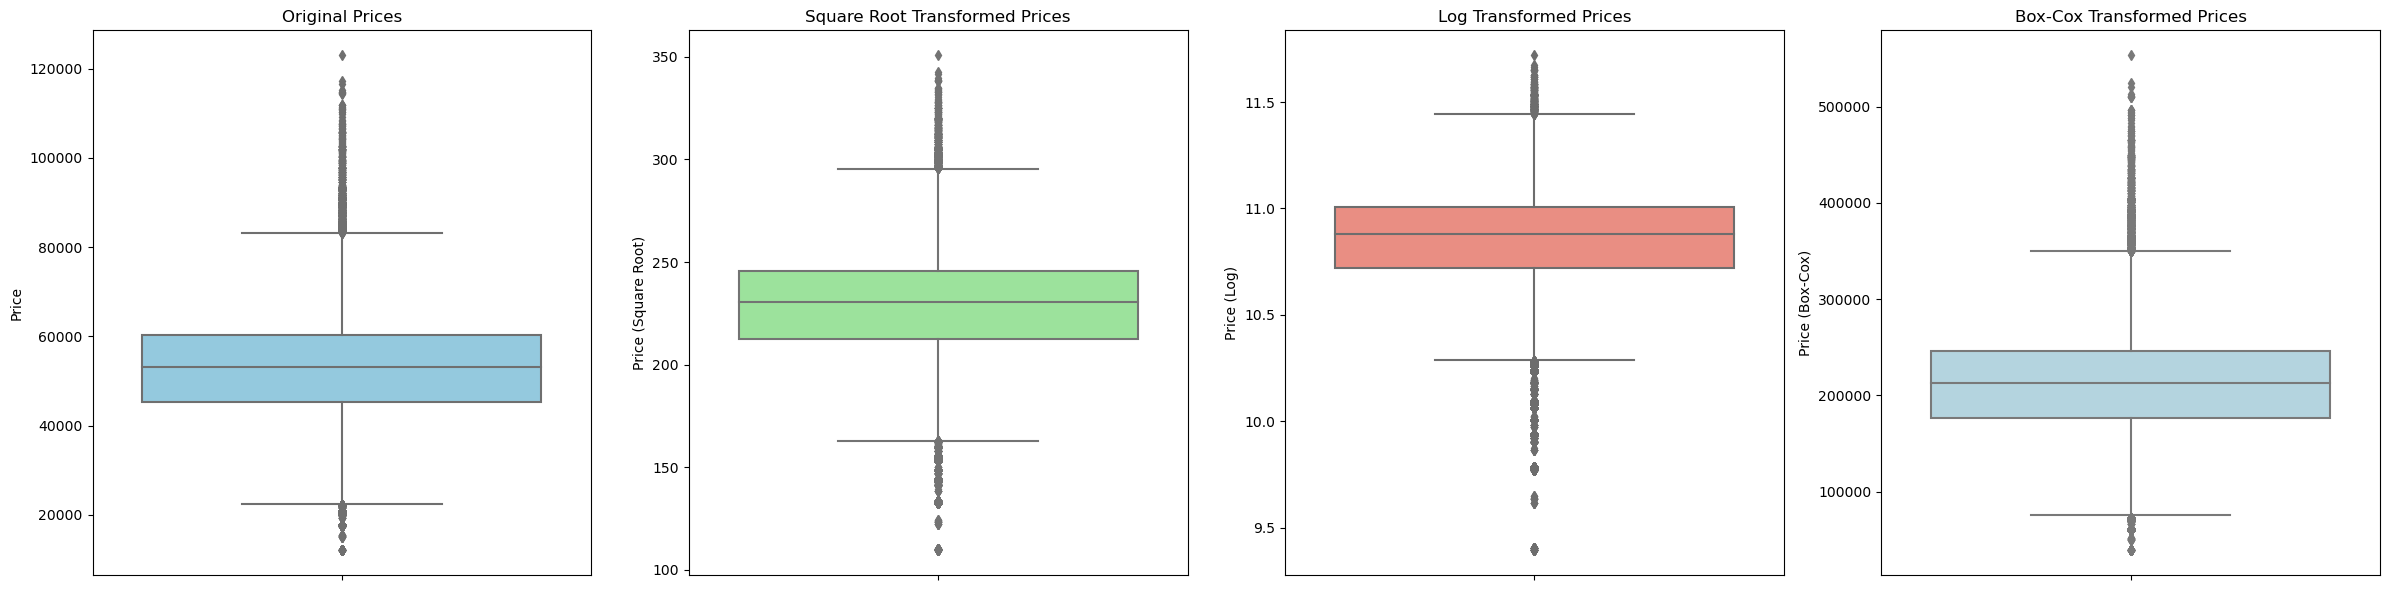

In [118]:
# Creating a figure with 4 subplots for boxplots of original and transformed prices
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# Original Price Boxplot
sns.boxplot(y=business_data['price'], ax=axes[0], color='skyblue')
axes[0].set_title('Original Prices')
axes[0].set_ylabel('Price')

# Square Root Transformed Price Boxplot
sns.boxplot(y=business_data['price_sqrt'], ax=axes[1], color='lightgreen')
axes[1].set_title('Square Root Transformed Prices')
axes[1].set_ylabel('Price (Square Root)')

# Log Transformed Price Boxplot
sns.boxplot(y=business_data['price_log'], ax=axes[2], color='salmon')
axes[2].set_title('Log Transformed Prices')
axes[2].set_ylabel('Price (Log)')

# Box-Cox Transformed Price Boxplot
sns.boxplot(y=business_data['price_boxcox'], ax=axes[3], color='lightblue')
axes[3].set_title('Box-Cox Transformed Prices')
axes[3].set_ylabel('Price (Box-Cox)')

plt.tight_layout()
plt.show()

In [115]:
from scipy.stats import boxcox

# Preparing the data for Box-Cox transformation
# Filtering positive prices for both classes
economy_positive_prices = data[(data['class'] == 'economy') & (data['price'] > 0)]['price']
business_positive_prices = data[(data['class'] == 'business') & (data['price'] > 0)]['price']

# Applying Box-Cox transformation
_, economy_lmbda = boxcox(economy_positive_prices)
economy_prices_boxcox = boxcox(economy_positive_prices, lmbda=economy_lmbda)

_, business_lmbda = boxcox(business_positive_prices)
business_prices_boxcox = boxcox(business_positive_prices, lmbda=business_lmbda)

# Continue with the normality tests as previously described
from scipy.stats import normaltest

# Data dictionary for iteration
classes_prices = {
    'Economy Original': economy_prices_original,
    'Business Original': business_prices_original,
    'Economy Sqrt': economy_prices_sqrt,
    'Business Sqrt': business_prices_sqrt,
    'Economy Log': economy_prices_log,
    'Business Log': business_prices_log,
    'Economy Box-Cox': pd.Series(economy_prices_boxcox),  # Converting to Series for compatibility
    'Business Box-Cox': pd.Series(business_prices_boxcox)
}

# Perform and print the normality test results for each
for label, prices in classes_prices.items():
    stat, pvalue = normaltest(prices.dropna())
    print(f"{label} Normality Test: Statistic={stat}, P-value={pvalue}")
    

# Economy Original Normality Test: Statistic=69995.65229354819, P-value=0.0
# Business Original Normality Test: Statistic=1477.4614209842694, P-value=0.0
# Economy Sqrt Normality Test: Statistic=22625.170799029263, P-value=0.0
# Business Sqrt Normality Test: Statistic=7349.6589965522235, P-value=0.0
# Economy Log Normality Test: Statistic=72.29686508204837, P-value=1.9995635802636716e-16
# Business Log Normality Test: Statistic=19521.525828510275, P-value=0.0
# Economy Box-Cox Normality Test: Statistic=14.362321850417072, P-value=0.0007607841158217032
# Business Box-Cox Normality Test: Statistic=1578.1346925973369, P-value=0.0
# NO p>0.5 so No Normal Distribution :(

Economy Original Normality Test: Statistic=69995.65229354819, P-value=0.0
Business Original Normality Test: Statistic=1477.4614209842694, P-value=0.0
Economy Sqrt Normality Test: Statistic=22625.170799029263, P-value=0.0
Business Sqrt Normality Test: Statistic=7349.6589965522235, P-value=0.0
Economy Log Normality Test: Statistic=72.29686508204837, P-value=1.9995635802636716e-16
Business Log Normality Test: Statistic=19521.525828510275, P-value=0.0
Economy Box-Cox Normality Test: Statistic=14.362321850417072, P-value=0.0007607841158217032
Business Box-Cox Normality Test: Statistic=1578.1346925973369, P-value=0.0


In [119]:
###### Explore Days left with price ######

data['days_left'].describe()

count    300261.000000
mean         26.004473
std          13.560985
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

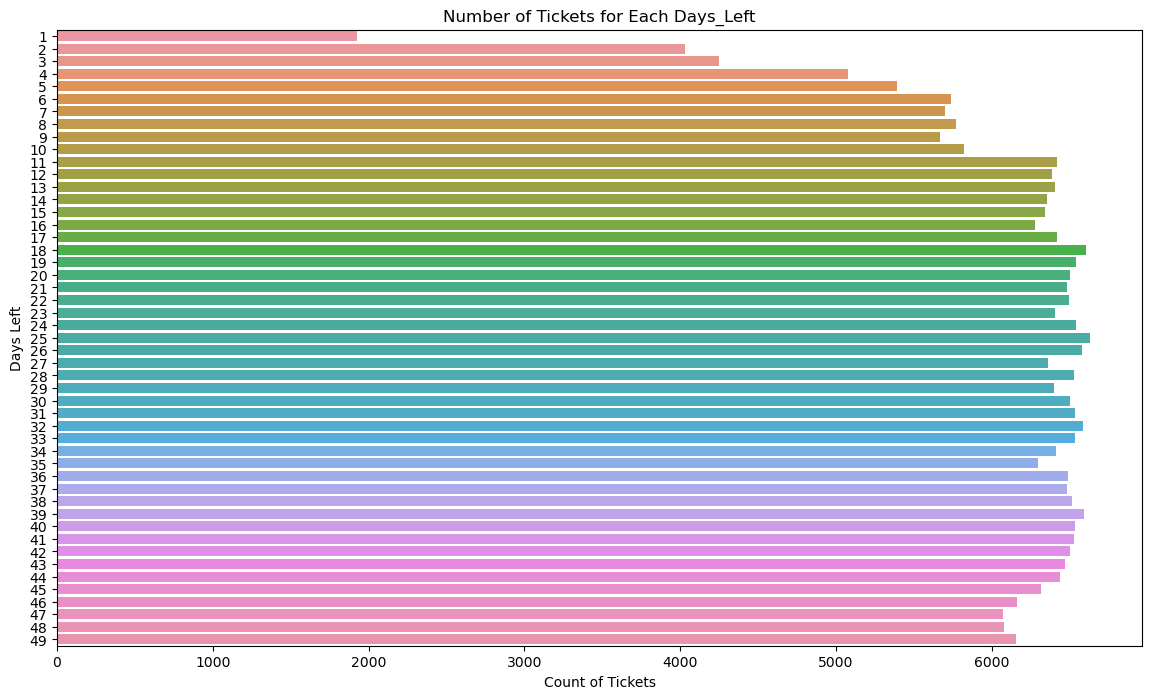

In [120]:
sorted_days_left = sorted(data['days_left'].unique())

plt.figure(figsize=(14, 8))
sns.countplot(y='days_left', data=data, order=sorted_days_left)
plt.title('Number of Tickets for Each Days_Left')
plt.xlabel('Count of Tickets')
plt.ylabel('Days Left')
plt.show()

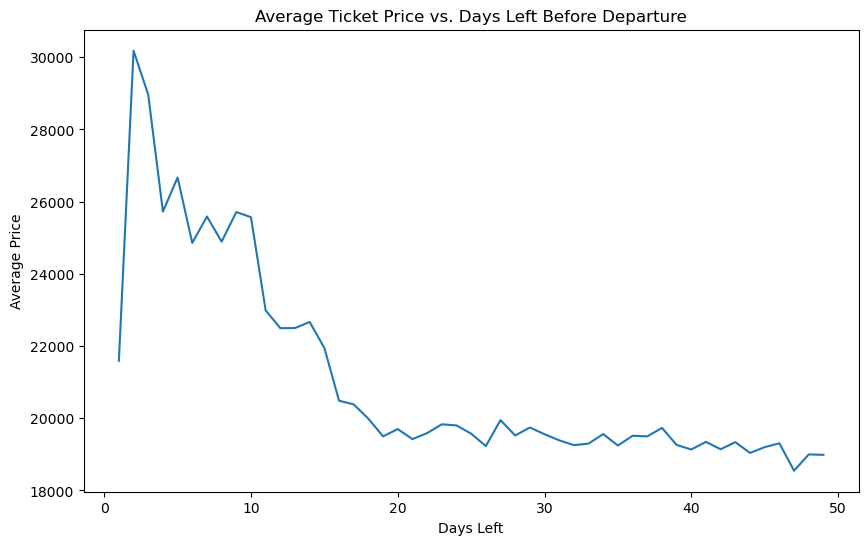

In [121]:
# Line Plot of Average Prices
average_prices_by_days = data.groupby('days_left')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='days_left', y='price', data=average_prices_by_days)
plt.title('Average Ticket Price vs. Days Left Before Departure')
plt.xlabel('Days Left')
plt.ylabel('Average Price')
plt.show()


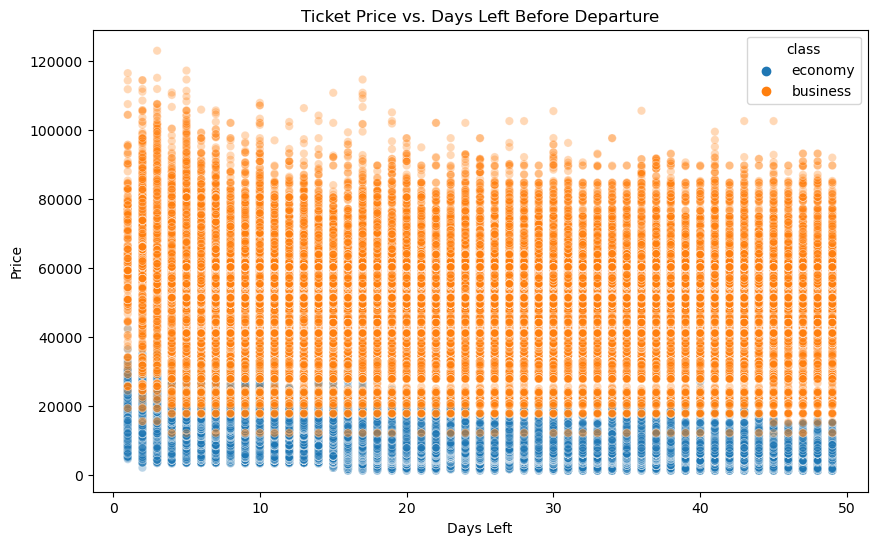

In [140]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='days_left', y='price', data=data, alpha=0.3, hue='class')
plt.title('Ticket Price vs. Days Left Before Departure')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.show()

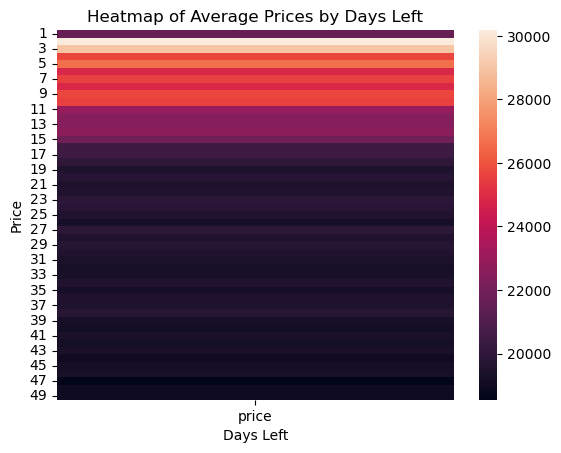

In [123]:
# Heatmap
# First, create a pivot table or 2D histogram data. Here's a conceptual placeholder.
heatmap_data = data.pivot_table(values='price', index='days_left', aggfunc=np.mean)  # Adjust as needed
sns.heatmap(heatmap_data)
plt.title('Heatmap of Average Prices by Days Left')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.show()

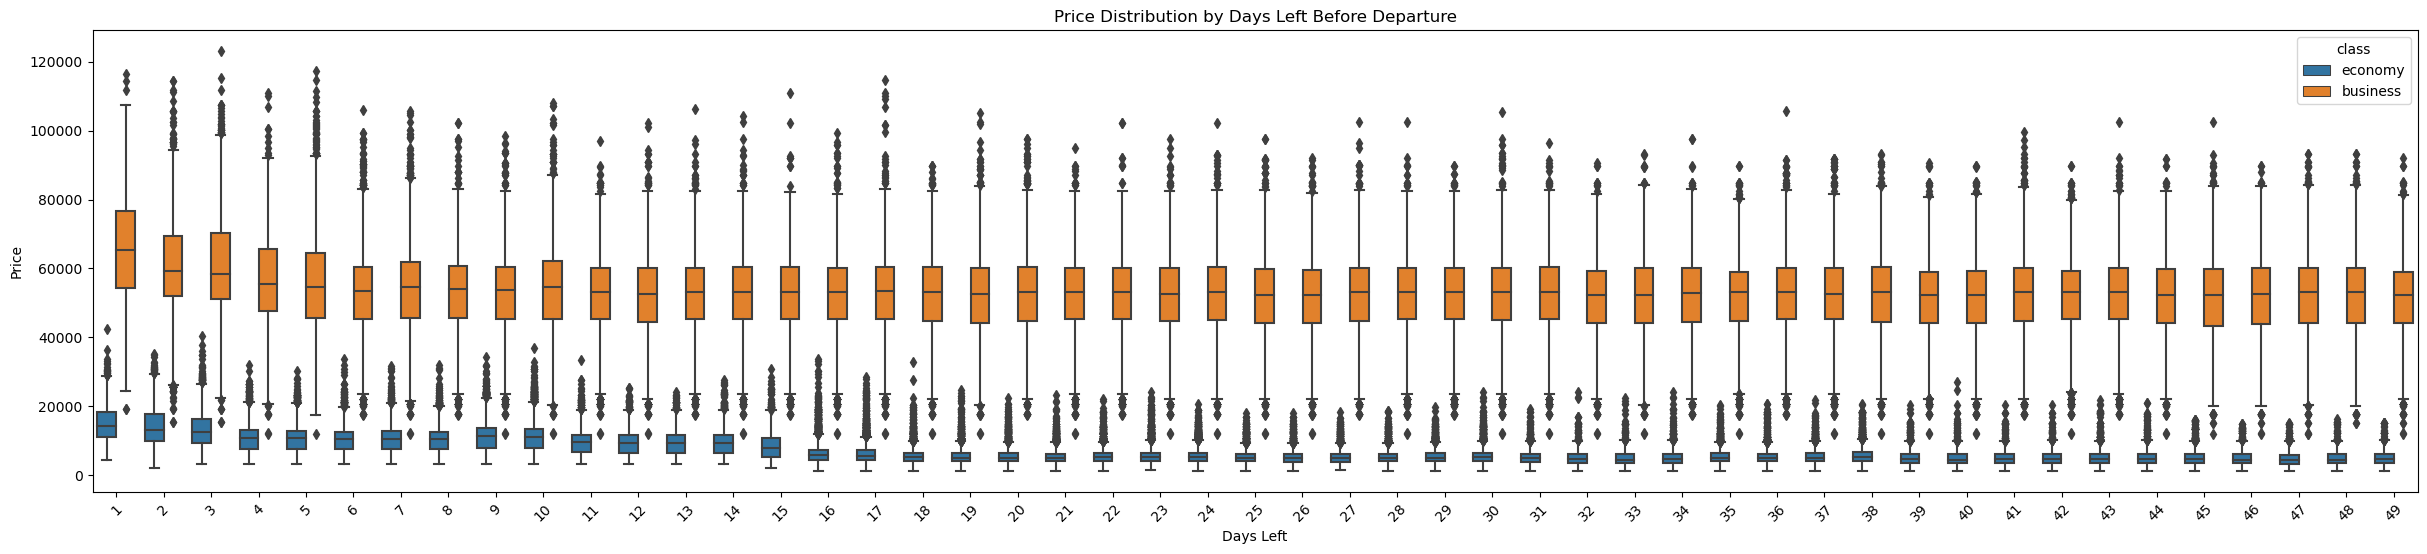

In [139]:
# Box Plot
plt.figure(figsize=(30, 6))
sns.boxplot(x='days_left', y='price', data=data, hue='class')
plt.title('Price Distribution by Days Left Before Departure')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()